<a href="https://colab.research.google.com/github/TahaCycle/ML/blob/main/Oxford_Flower_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Oxford Flowers102
The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring in the United Kingdom. Each class consists of between 40 and 258 images. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set. The training set and validation set each consist of 10 images per class (totalling 1020 images each). The test set consists of the remaining 6149 images (minimum 20 per class).

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e4379f79-6cc6-7976-3eb7-00c9b109f3c9)


In [2]:
!wget https://raw.githubusercontent.com/TahaCycle/ML/main/helper_function.py

--2022-08-23 07:10:44--  https://raw.githubusercontent.com/TahaCycle/ML/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_function.py.1’

helper_function.py. 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-23 07:10:44 (86.7 MB/s) - ‘helper_function.py.1’ saved [10246/10246]



##Importing Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import helper_function
import tensorflow_datasets as tfds

##Importing Dataset

In [4]:
ds_list = tfds.list_builders()
(train_data, validation_data, test_data), ds_info = tfds.load(name="oxford_flowers102", # target dataset to get from TFDS
                                                              split=["train", "validation", "test"], # what splits of data should we get? note: not all datasets have train, valid, test
                                                              shuffle_files=True, # shuffle files on download?
                                                              as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                                              with_info=True)

In [7]:
ds_info.features
# Get class names
class_names = ds_info.features["label"].names
print(class_names)

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

##Exploring the DataSet

In [8]:
train_sample = train_data.take(10)
train_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
# Output info about our training sample
for image, label in train_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (500, 667, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 72
  Class name (str form): water lily
        

  Image shape: (500, 666, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 84
  Class name (str form): desert-rose
        

  Image shape: (670, 500, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 70
  Class name (str form): gazania
        

  Image shape: (500, 505, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 51
  Class name (str form): wild pansy
        

  Image shape: (500, 672, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 48
  Class name (str form): oxeye daisy
        

  Image shape: (500, 761, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 83
  Class name (str form): columbine
        

  Image shape: (667, 500, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Fo

In [10]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

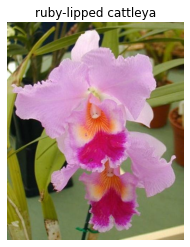

In [34]:
# Plot an image tensor
import matplotlib.pyplot as plt

for i in range(10):
  train_sample1 = train_data.take(i+1)
  for image, label in train_sample1:
    plt.imshow(image)
    plt.title(class_names[label.numpy()])
    plt.axis(False);
  # for image, label in train_sample:
  #   plt.imshow(image)
  #   plt.title(class_names[label.numpy()])
  #   plt.axis(False);

In [35]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes image to
  [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [36]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to validation data
validation_data = validation_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn validation data into batches (don't need to shuffle)
validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [37]:
train_data, validation_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [38]:
from helper_function import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [39]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

<Policy "mixed_float16">

In [40]:
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [41]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
 softmax_float32 (Activation  (None, 102)              0         
 )                                                               
                                                                 
Total params: 4,180,233
Trainable params: 130,662
Non-trainab

In [46]:
history_102_flower_classes_feature_extract = model.fit(train_data, 
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=validation_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20220823-083134
Epoch 1/5
32/32 [==============================] - 5s 113ms/step - loss: 0.6592 - accuracy: 0.9725 - val_loss: 1.1469 - val_accuracy: 0.8337
Epoch 2/5
32/32 [==============================] - 6s 141ms/step - loss: 0.5167 - accuracy: 0.9794 - val_loss: 1.0448 - val_accuracy: 0.8315
Epoch 3/5
32/32 [==============================] - 6s 131ms/step - loss: 0.4150 - accuracy: 0.9882 - val_loss: 0.9667 - val_accuracy: 0.8393
Epoch 4/5
32/32 [==============================] - 5s 116ms/step - loss: 0.3388 - accuracy: 0.9922 - val_loss: 0.9071 - val_accuracy: 0.8415
Epoch 5/5
32/32 [==============================] - 6s 141ms/step - loss: 0.2852 - accuracy: 0.9931 - val_loss: 0.8624 - val_accuracy: 0.8359


In [48]:
model.evaluate(test_data)

193/193 [==============================] - 13s 68ms/step - loss: 0.9522 - accuracy: 0.8353


[0.9522320628166199, 0.8352577686309814]

In [49]:
!tensorboard dev upload --logdir ./training_logs \
  --name "Oxford_Flowers102" \
  --description "Training results" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./training_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=HMqZcRzE3puXQ5lLipceHoaBljlxIX&prompt=consent&access_type=offli